In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.17.0


In [3]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [11]:
# create dummy ohe
geography = pd.get_dummies(x['Geography'], drop_first=True,dtype=int)
gender = pd.get_dummies(x['Gender'], drop_first=True,dtype=int)

In [12]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
# concate the data frames
x = pd.concat([x, geography, gender], axis=1)
# drop unnecessary columns
x = x.drop(['Geography', 'Gender'], axis=1)
# split the dataset into the train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)



In [14]:
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
2151,753,57,7,0.00,1,1,0,159475.08,0,0,1
8392,739,32,3,102128.27,1,1,0,63981.37,1,0,1
5006,755,37,0,113865.23,2,1,1,117396.25,1,0,0
4117,561,37,5,0.00,2,1,0,83093.25,0,0,1
7182,692,49,6,110540.43,2,0,1,107472.99,1,0,1


In [15]:
y_train

,Exited
2151,1
8392,1
5006,0
4117,0
7182,0
...,...
4555,1
4644,0
8942,0
2935,0


In [16]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
x_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

In [44]:
# Now lets create an ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [45]:
# initialising the ANN
model=Sequential()

In [46]:
# Adding the input layer
model.add(Dense(units=11, activation='relu'))
# Adding the first hidden layer
model.add(Dense(units=7, activation='relu'))
# Adding Droupout Layer
model.add(Dropout(0.3))
# Adding the second hidden layer
model.add(Dense(units=6, activation='relu'))
#Adding Droup out layer
model.add(Dropout(0.4))
# Adding the output layer
model.add(Dense(units=1, activation='sigmoid'))

In [47]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# es = EarlyStopping(monitor='val_loss', min_delta=0.0001 , mode='auto', verbose=1, patience=100)
es = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

### Early Stopping Doc
https://keras.io/api/callbacks/early_stopping/

In [50]:
# Fit the model with validation set
model_history = model.fit(x_train, y_train, validation_split=0.2, batch_size=10, epochs=1000,callbacks=es)


Epoch 1/1000
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6344 - loss: 0.6665 - val_accuracy: 0.8000 - val_loss: 0.4869
Epoch 2/1000
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8019 - loss: 0.5235 - val_accuracy: 0.8000 - val_loss: 0.4732
Epoch 3/1000
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8008 - loss: 0.4987 - val_accuracy: 0.7994 - val_loss: 0.4514
Epoch 4/1000
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7983 - loss: 0.4733 - val_accuracy: 0.8000 - val_loss: 0.4374
Epoch 5/1000
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8044 - loss: 0.4730 - val_accuracy: 0.8175 - val_loss: 0.4159
Epoch 6/1000
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8145 - loss: 0.4456 - val_accuracy: 0.8238 - val_loss: 0.3982
Epoch 7/1000
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8083 - loss: 0.4511 - val_accuracy: 0.8200 - val_loss: 0.3944
Epoch 8/1000
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8246 - loss: 0.4317 - 

In [51]:
# lsit all in history
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Text(0.5, 0, 'Epoch')

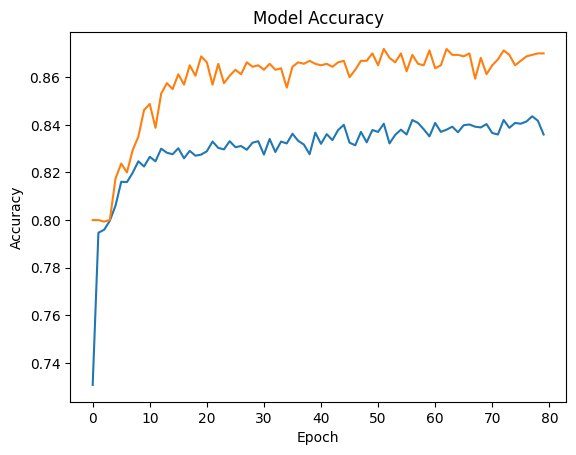

In [52]:
# Plot accuracy and val_accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

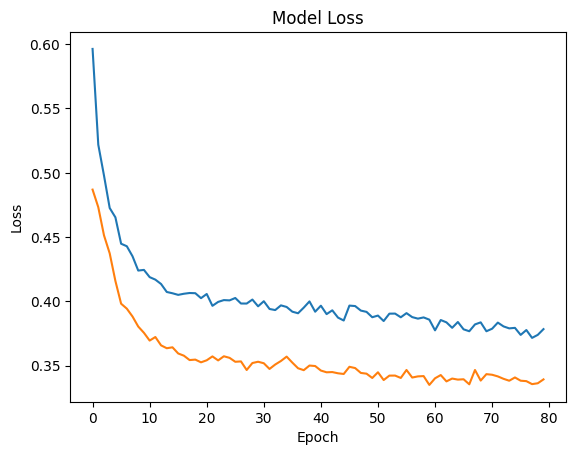

In [53]:
# plot loss and val loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [54]:
# Making the prediction and evaluating the Model
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [55]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1563,   30],
       [ 262,  145]])

In [56]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.854